<a href="https://colab.research.google.com/github/Aravindmurali93/ICTAC-assignment-/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
train = pd.read_csv ('/content/train_ctrUa4K.csv')

In [8]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
test = pd.read_csv('/content/test_lAUu6dG.csv')

In [10]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


**Data Pre processing**

In [11]:
train.drop(columns =['Loan_ID'], inplace = True)

In [12]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
train.isnull().sum()*100/train.shape[0]

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
train['Credit_History'].fillna(0, inplace= True)
train['Self_Employed'].fillna('No',inplace = True)
train['LoanAmount'].fillna(0, inplace= True)
train['Dependents'].fillna(0, inplace= True)
train['Loan_Amount_Term'].fillna(0, inplace= True)
train['Gender'].fillna('other', inplace = True)
train['Married'].fillna('other', inplace = True)

In [15]:
train.isnull().sum()*100/train.shape[0]

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

D**ata Analysis**

<Axes: xlabel='Loan_Status', ylabel='count'>

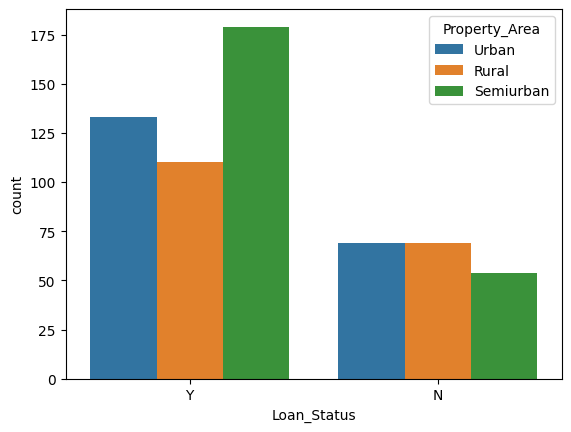

In [16]:
sns.countplot( data =train,x='Loan_Status',hue='Property_Area')

<Axes: xlabel='Loan_Status', ylabel='count'>

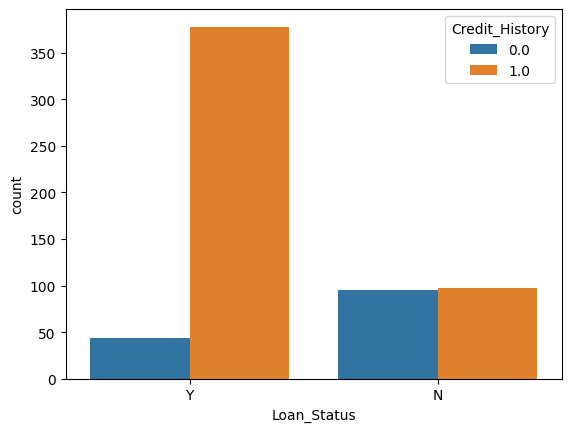

In [17]:
sns.countplot( data =train,x='Loan_Status',hue='Credit_History')

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

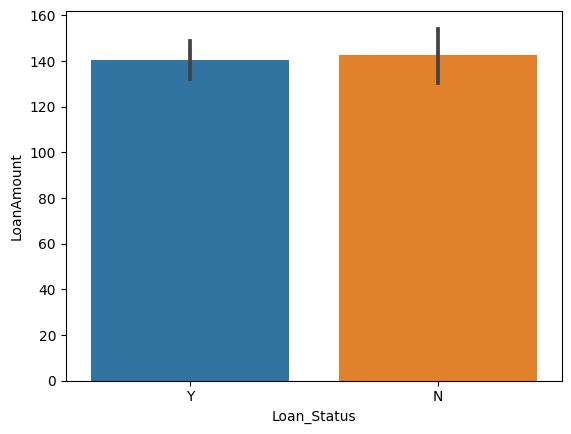

In [18]:
sns.barplot( data =train,x='Loan_Status',y='LoanAmount')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

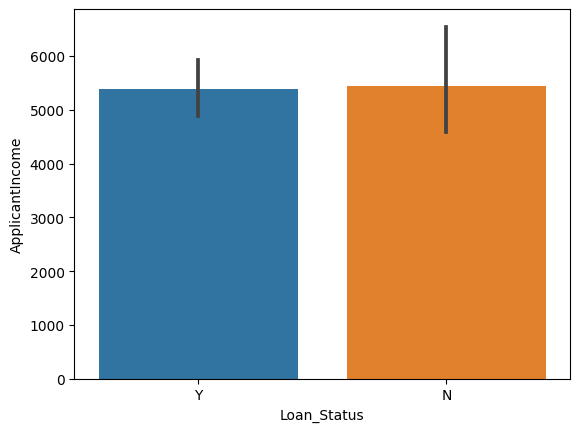

In [19]:
sns.barplot( data =train,x='Loan_Status',y='ApplicantIncome')

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

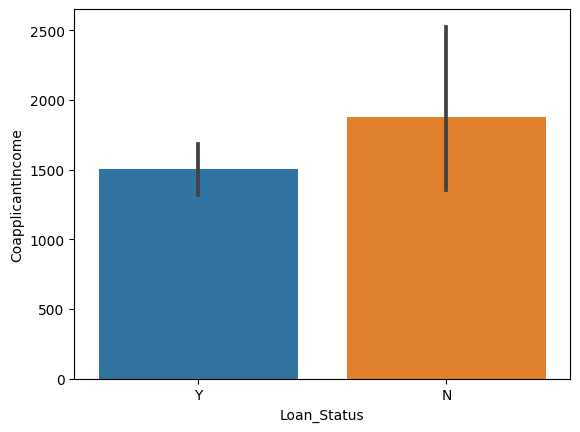

In [20]:
sns.barplot( data =train,x='Loan_Status',y='CoapplicantIncome')

<Axes: xlabel='Loan_Status', ylabel='count'>

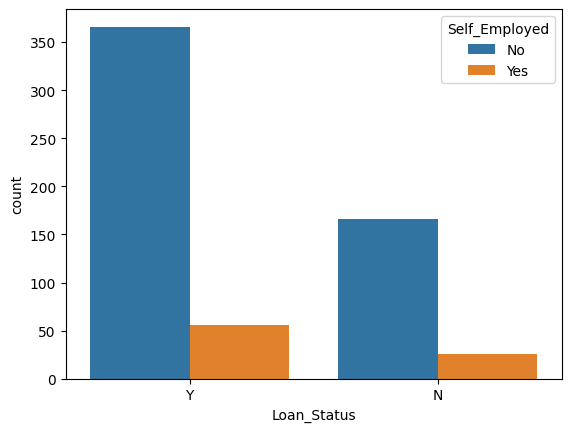

In [21]:
sns.countplot( data =train,x='Loan_Status',hue='Self_Employed')

<Axes: xlabel='Loan_Status', ylabel='count'>

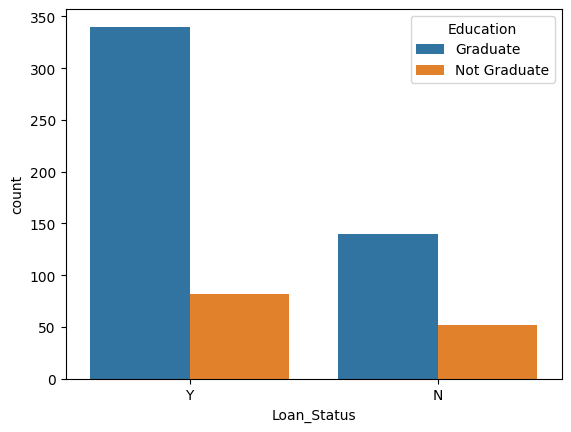

In [22]:
sns.countplot( data =train,x='Loan_Status',hue='Education')

<Axes: xlabel='Loan_Status', ylabel='count'>

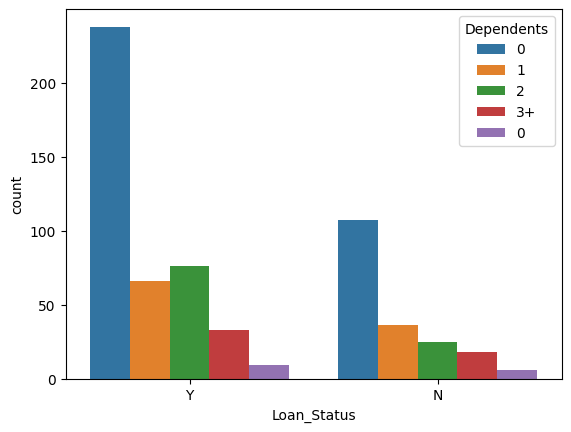

In [23]:
sns.countplot( data =train,x='Loan_Status',hue='Dependents')

<Axes: xlabel='Loan_Status', ylabel='count'>

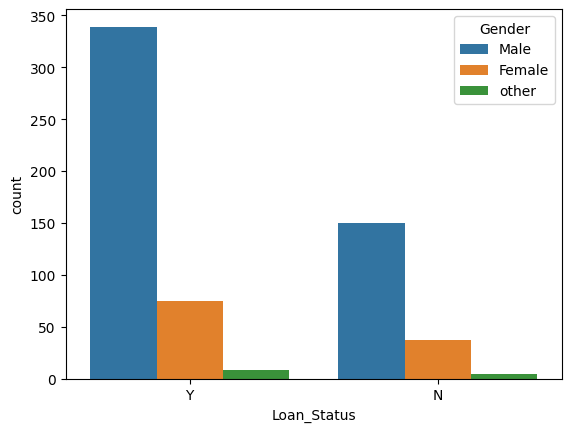

In [24]:
sns.countplot( data =train,x='Loan_Status',hue='Gender')

**Data Preprocessing part2**

In [25]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [26]:
train = train.drop(['Dependents'], axis =1)

In [27]:
train['Gender'].unique()

array(['Male', 'Female', 'other'], dtype=object)

In [28]:
train['Married'].unique()

array(['No', 'Yes', 'other'], dtype=object)

In [30]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [31]:
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [33]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [35]:
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Gender'].unique()


array([1, 0, 2])

In [36]:
train['Married'] = label_encoder.fit_transform(train['Married'])
train['Married'].unique()

array([0, 1, 2])

In [37]:
train['Education'] = label_encoder.fit_transform(train['Education'])
train['Education'].unique()

array([0, 1])

In [38]:
train['Self_Employed'] = label_encoder.fit_transform(train['Self_Employed'])
train['Self_Employed'].unique()

array([0, 1])

In [39]:
train['Property_Area'] = label_encoder.fit_transform(train['Property_Area'])
train['Property_Area'].unique()

array([2, 0, 1])

In [40]:
train['Loan_Status'] = label_encoder.fit_transform(train['Loan_Status'])
train['Loan_Status'].unique()

array([1, 0])

**Machine Learning and Model Building**

In [41]:
x =train.drop('Loan_Status',axis =1)
y = train['Loan_Status']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
x_train,x_test ,y_train ,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

**Decision tree classifier**

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train , y_train)

DecisionTreeClassifier(random_state=0)

In [46]:
y_pred = dtree.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,y_pred))

Accuracy score : 0.6097560975609756


In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score ,recall_score
print('F1 score:',f1_score(y_test,y_pred))

F1 score: 0.7241379310344827


In [48]:
print ( 'precision score :',precision_score(y_test,y_pred))
print(' recall score:',recall_score(y_test,y_pred))

precision score : 0.75
 recall score: 0.7


**Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier (random_state=0)
rfc.fit(x_train , y_train)
y_pred =  rfc.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score ,recall_score
print('F1 score:',f1_score(y_test,y_pred))

F1 score: 0.8324324324324324


In [52]:

print(' recall score:',recall_score(y_test,y_pred))
print ( 'precision score :',precision_score(y_test,y_pred))

 recall score: 0.8555555555555555
precision score : 0.8105263157894737


**Logistic Regression**

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [54]:
y_pred = lr.predict(x_test)

In [55]:
print('Accuracy Score :', accuracy_score(y_test, y_pred))

Accuracy Score : 0.8048780487804879


In [56]:
print('F1 score:',f1_score(y_test,y_pred))

F1 score: 0.8723404255319148


In [57]:
print(' recall score:',recall_score(y_test,y_pred))
print ( 'precision score :',precision_score(y_test,y_pred))

 recall score: 0.9111111111111111
precision score : 0.8367346938775511


**Feature Importance**

In [58]:
imp_df = pd.DataFrame({
    'feature name': x_train.columns,
    'importance' : rfc.feature_importances_
})

In [59]:
imp_df

,feature name,importance
0,Gender,0.039199
1,Married,0.029037
2,Education,0.027094
3,Self_Employed,0.024575
4,ApplicantIncome,0.237522
5,CoapplicantIncome,0.138948
6,LoanAmount,0.226147
7,Loan_Amount_Term,0.049017
8,Credit_History,0.176758
9,Property_Area,0.051704
